### Correlation

Correlation is how similar the images are. It is useful for image search.

In [11]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib

(3750, 6000)


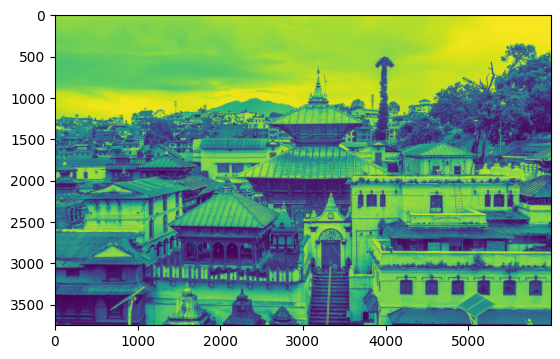

In [3]:
temple_large = cv.imread("pashupati_big.jpg", 0)
print(temple_large.shape)
plt.imshow(temple_large) 

(105, 136)


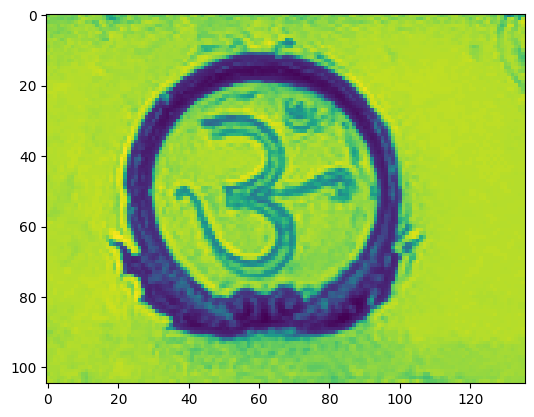

In [4]:
small_logo = cv.imread("om.png", 0)
print(small_logo.shape)
plt.imshow(small_logo) 

In [5]:
from scipy import signal

In [6]:
help(signal.correlate2d)

Help on function correlate2d in module scipy.signal._signaltools:

correlate2d(in1, in2, mode='full', boundary='fill', fillvalue=0)
    Cross-correlate two 2-dimensional arrays.
    
    Cross correlate `in1` and `in2` with output size determined by `mode`, and
    boundary conditions determined by `boundary` and `fillvalue`.
    
    Parameters
    ----------
    in1 : array_like
        First input.
    in2 : array_like
        Second input. Should have the same number of dimensions as `in1`.
    mode : str {'full', 'valid', 'same'}, optional
        A string indicating the size of the output:
    
        ``full``
           The output is the full discrete linear cross-correlation
           of the inputs. (Default)
        ``valid``
           The output consists only of those elements that do not
           rely on the zero-padding. In 'valid' mode, either `in1` or `in2`
           must be at least as large as the other in every dimension.
        ``same``
           The output is

In [7]:
correlation = signal.correlate2d(temple_large, small_logo, boundary='symm', mode='full')
print(type(correlation))

<class 'numpy.ndarray'>


In [8]:
correlation

array([[ 22, 202, 190, ..., 184,   2,  24],
       [126,  68,  25, ..., 130,  42,  32],
       [188,  83, 158, ...,  57,  34,  35],
       ...,
       [ 63, 180, 121, ..., 215,  85,  13],
       [ 42,  25,  42, ...,  29,  91,   9],
       [  6, 168, 138, ...,  50, 190, 158]],
      shape=(3854, 6135), dtype=uint8)

In [15]:
np.argmax(correlation[:])

np.int64(97)

In [9]:
# largest correlation value
y, x = np.unravel_index(np.argmax(correlation), correlation.shape)
y, x 

(np.int64(0), np.int64(97))

In [10]:
correlation[x, y]

np.uint8(27)

/tmp/ipykernel_99187/37687420.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


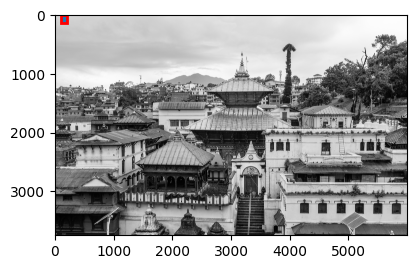

In [13]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.imshow(temple_large, cmap='gray')

# rect 
rect = matplotlib.patches.Rectangle((x, y), small_logo.shape[0], small_logo.shape[1], linewidth=2, edgecolor='r')
ax1.add_patch(rect)
fig.show() 